In [1]:
# Normal Distribution
# Two halves from the mean are equally distributed.
# 68% of the data falls within one standard deviation, 95% of the data falls within two standard deviation, 98% of the data falls within third standard deviation.
# mean, median and mode are same.

In [2]:
#summary statistics
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('C:/Users/hninshwezinhlaing/Downloads/CRM+Sales+Opportunities/sales_pipeline.csv')
close_column = data['close_value']
#calculate summary statistics
summary_stats = close_column.describe()
mean = close_column.mean()
skew = close_column.skew()
# o is symmetric
# less than 0 is negative skew
# greater than 0 is positive skew
median = close_column.median()
print(summary_stats)
print("Mean:", mean)
print("Median", median)
print("Skew:", skew)

count     8800.000000
mean      1136.992500
std       2123.528615
min          0.000000
25%          0.000000
50%          0.000000
75%       1085.250000
max      30288.000000
Name: close_value, dtype: float64
Mean: 1136.9925
Median 0.0
Skew: 3.978906434729735


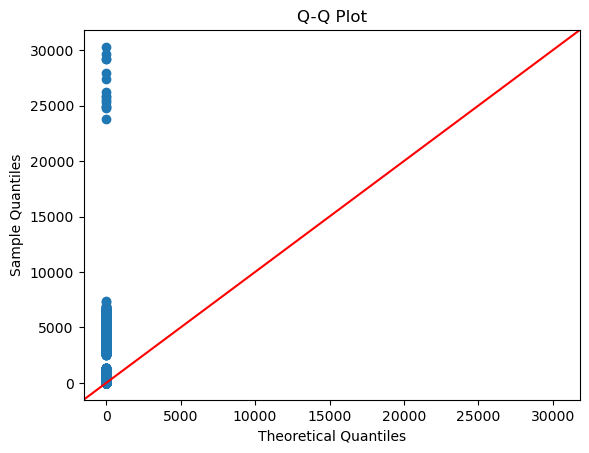

In [3]:
## Q-Q plot
## visual indication fo how well the data fits theoretical normal distribution
## less informative with small sample sizes
## designed for unimodal distributions(single peak where the highest frequency of observations occurs, Symmetric(bell shaped like normal distribution) or asymmetric (skewed to left or right), central tendency(mean, median and mode are typically close), for data with multiple modes or complex distribution, interpreting this plots can be more challenging and may require additional diagnostics.
## If normal distribution, data points fall right on the line. if not, it is not similar theoretical one.
sm.qqplot(close_column,line='45')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot')
plt.show()

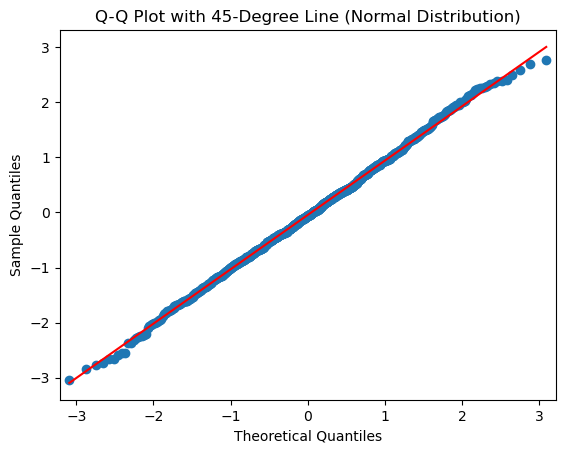

In [4]:
#normal distribution sample shape
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate example data following a normal distribution
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)

# Create Q-Q plot with the 45-degree line added
fig = sm.qqplot(data, line='s')

# Add labels and title
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot with 45-Degree Line (Normal Distribution)')

# Show plot
plt.show()

In [5]:
#interquartile range for removing outliers
Q1 = close_column.quantile(0.25)
Q3 = close_column.quantile(0.75)
IQR = Q3 - Q1
threshold = Q3 + 1.5 * IQR

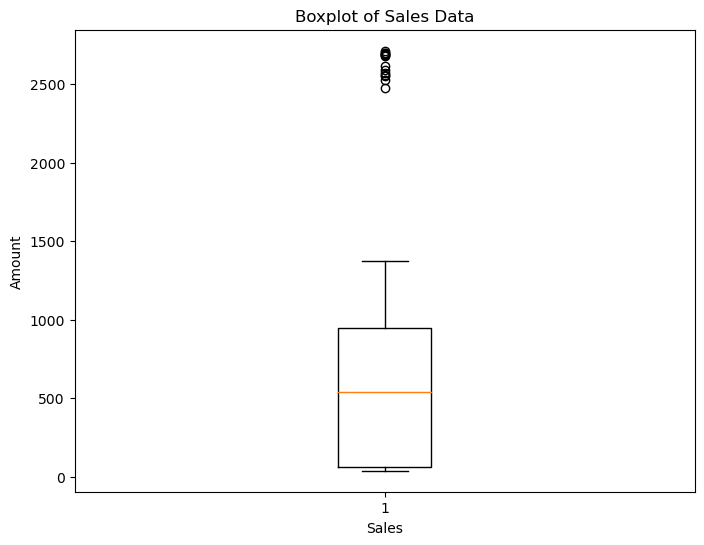

In [6]:
#Box Plot
#This is not a normal distribution because mean line is closer to the top of boxplot. This is right skewed.
plt.figure(figsize=(8,6))
close_column_without_outliers = close_column[(close_column < threshold) & (close_column != 0)]
plt.boxplot(close_column_without_outliers)
plt.xlabel('Sales')
plt.ylabel('Amount')
plt.title('Boxplot of Sales Data')
plt.show()

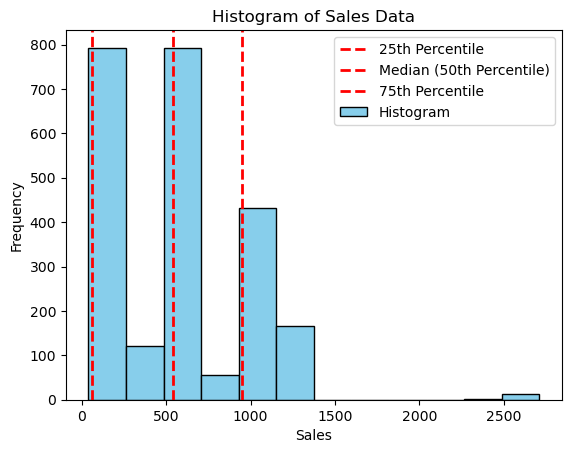

In [16]:
# Histogram
# calculate the number of appropriate bins
num_bins = int(1 + np.log2(len(close_column_without_outliers)))
bin_edges = np.histogram_bin_edges(close_column_without_outliers, bins=num_bins)
percentiles = np.percentile(close_column_without_outliers,[25,50,75])
plt.hist(close_column_without_outliers,bins=bin_edges,color='skyblue',edgecolor='black')

# Add vertical lines for each percentile
for percentile in percentiles:
    plt.axvline(percentile,color='red',linestyle='--',linewidth=2)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales Data')
plt.legend(['25th Percentile','Median (50th Percentile)','75th Percentile','Histogram'])
plt.show()

In [8]:
#check shapiro test
#shapiro is appropriate less than data size 5000.
from scipy.stats import shapiro
statistic, p_value = shapiro(close_column)
alpha = 0.05
if p_value>alpha:
    print("Normal Distribution")
else:
    print("Non Normal Distribution")

Non Normal Distribution


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [9]:
#Anderson-Darling Test
#it is suitable more than 5000 data points.
from scipy.stats import anderson
result = anderson(close_column_without_outliers)
# result.statistic is compared with critical values in 5% 
if result.statistic < result.critical_values[2]:
    print("Normal Distribution")
else:
    print("Non Normal Distribution")

Non Normal Distribution


In [10]:
#Kolmogorov-Smirnov test
from scipy.stats import kstest, norm
ks_statistic, p_value = kstest(close_column,'norm')
print(kstest(close_column,'norm'))
alpha = 0.05
if p_value > alpha:
    print("Normal Distribution")
else:
    print("Non Normal Distribution")

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)
Non Normal Distribution


[2317.52807758 3032.07865328  240.24584233 ... 3201.38490254 -814.31425314
 2545.32264648]


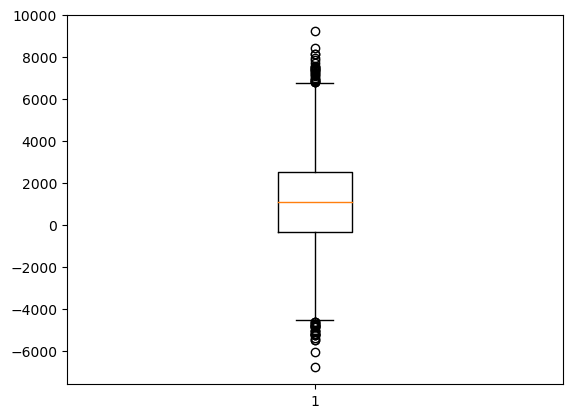

In [11]:
mu,std = np.mean(close_column), np.std(close_column)
num_samples = len(close_column)
normal_data = np.random.normal(mu,std,num_samples)
print(normal_data)
#qqplot
#fig = sm.qqplot(normal_data)
#boxplot
fig = plt.boxplot(normal_data)